In [10]:
import cv2

im = cv2.imread("ims/35d8cc03591484b632eac366dfc3bf6dx.jpg")


True

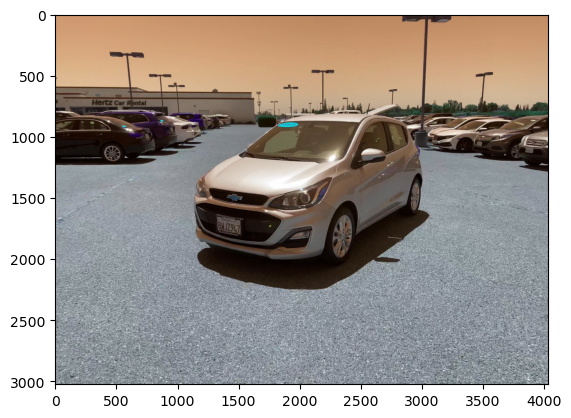

In [11]:
import cv2
from matplotlib import pyplot as plt

# Load the image
img = im

# Display the original image
plt.imshow(img)

# Zoom in on the image
zoom_in = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Display the zoomed-in image


# Zoom out on the image
zoom_out = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)


# Display the zoomed-out image

# Wait for a key press and then close all windows
cv2.imwrite("org.png", img)


True

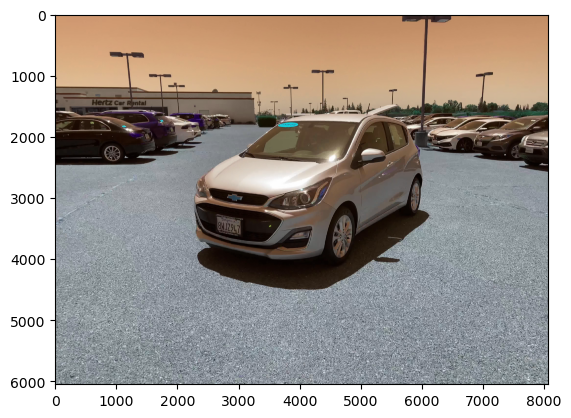

In [12]:
plt.imshow(zoom_in)
cv2.imwrite("in.png", zoom_in)

True

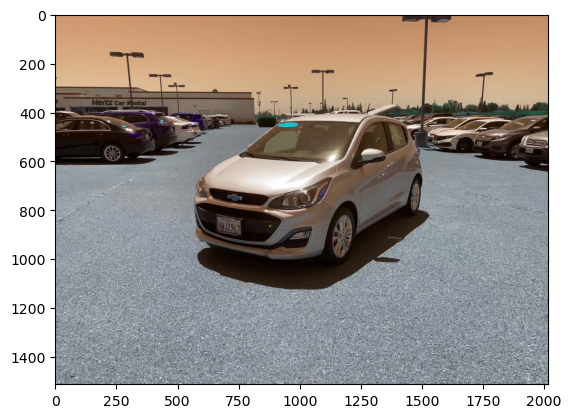

In [13]:
plt.imshow(zoom_out)
cv2.imwrite("out.png", zoom_out)